In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

In [56]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

#### Q1 Load the following image and detect as much as you can all faces

In [5]:
img=cv2.imread("faces.jpg")
img.shape

(450, 750, 3)

In [6]:
grey=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
grey.shape

(450, 750)

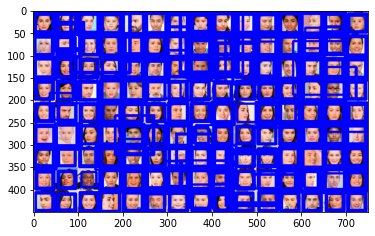

In [52]:
faces=face_cascade.detectMultiScale(grey,scaleFactor=1.005,minNeighbors=8,minSize=(40,40))
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(img[:,:,::-1])

#### Q2 Load the following image and detect faces,eye,smile and write under every detection label “Peter” ,”eye” ,”smile” as arranged.

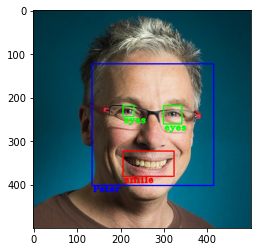

In [85]:
img=cv2.imread("peter.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3,minNeighbors=5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
    #cv2.putText(img,"Peter")
    cv2.putText(img,"Peter",(x+2,(y+h+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,0),2)
    smiles = smile_cascade.detectMultiScale(gray[y:y + h, x:x + w], scaleFactor=1.8, minNeighbors=20)
    eyes=eye_cascade.detectMultiScale(gray[y:y+h,x:x+w],scaleFactor=1.05,minNeighbors=4)

    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(img, (x+sx, y+sy), ((sx+x+sw), (sy+y+sh)), (0, 0, 255), 2)
        cv2.putText(img,"smile",(x+sx+2,(sy+y+sh+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),2)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(img, (x+ex, y+ey), ((ex+x+ew), (ey+y+eh)), (0, 255, 0), 2)
        cv2.putText(img,"eyes",(x+ex+2,(ey+y+eh+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),2)
plt.imshow(img[:,:,::-1])

#### Q3 Run your camera stream and make detection for faces,eye,smile and write under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye and others rectangle

In [106]:
vp=cv2.VideoCapture(0)
i=0
while(True):
    i+=1
    stat,frame=vp.read()
    img=np.copy(frame)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3,minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
        #cv2.putText(img,"Peter")
        cv2.putText(img,"Peter",(x+2,(y+h+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,0),2)
        smiles = smile_cascade.detectMultiScale(gray[y:y + h, x:x + w], scaleFactor=1.8, minNeighbors=20)
        eyes=eye_cascade.detectMultiScale(gray[y:y+h,x:x+w],scaleFactor=1.05,minNeighbors=20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(img, (x+sx, y+sy), ((sx+x+sw), (sy+y+sh)), (0, 0, 255), 2)
            cv2.putText(img,"smile",(x+sx+2,(sy+y+sh+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),2)
        for (ex, ey, ew, eh) in eyes:
            center=(int((2*(x+ex)+ew)/2), int((2*(y+ey)+eh)/2))
            cv2.circle(img, center, 20, (0, 255, 0), 2)
            cv2.putText(img,"eyes",(x+ex+2,(ey+y+eh+14)),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),2)
    cv2.imshow("image",img)

    key=cv2.waitKey(1)
    if(key==ord('s')):
        cv2.imwrite(f"img{i}.jpg",img)
    if(key==ord('q')):
        break
vp.release()
cv2.destroyAllWindows()

: 

In [102]:
vp.release()